# Main objective

The main objective of this lab is to use the k-nn algorithm for numerical handwriting classification.
The learning algorithm must predict the right number (target) associeted to the give image.

**k-nn is in-memory computation algorithm.**

**k-nn takes lot of time if the dataset if too large.**

**the k neighbor is a hyperparameter that impacts on the prediction accuracy.**

**Increase k not means that we will obtain a good prediction.**

**To get the right value of k, I suggest to plot the evolution of the loss function related to k and choice the k that involves the most small loss value**

# Useful libraries

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
# on importe la librairie qui contient les algorithmes de voisinage
from sklearn import neighbors
import matplotlib.pyplot as plt


# Data processing

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
print(mnist.data.shape)
#contient l'ensemble des X
#le x est composé de 70000 lignes et 784 colonnes
# au finish le dataset est composé de 7000*784 = 54,880,000

(70000, 784)


the data contains 70 000 of images and each image configuration is 28x28=784.

So we say that we will have 784 features.

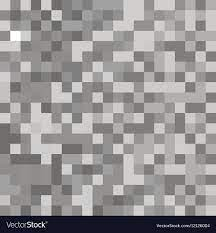

Each density pixel ranges between 0=white and 16=black

In [ ]:
print(mnist.target.shape)
# la fonction shape permet d'afficher les info sur votre dataset
#c'est a dire le nombre de ligne et colonne

(70000,)


# Sample for ease of work

We just take a 5000 samples because k-nn algorithm is time consumming. The time complexity is exponential is we have lot of data to classify.

In [ ]:
# ramdom sert à faire un tirage aleatoire dans 70000 nombres entiers
# le size represente le nombre de tirage qu'on veut faire
# dans notre cas size=5000 car on veut juste 5000 data pour entrainement
#x.take(list(train_index),axis=0)
#data = mnist.data[sample] ne marche pas a cause de la nouvelle version de mnist
# on applique la selection(sample) sur notre data
#target = mnist.target.take(list(sample), axis=0)
# on faire pareillement pour target
sample = np.random.randint(70000, size=5000)
data=mnist.data.take(list(sample), axis=0)
target = mnist.target[sample]

Here it's the size of the sample data and target

In [ ]:
print(data.shape) # affiche le data echantillonné
print(target.shape) # affiche le target du nouveau data

(5000, 784)
(5000,)


# Split into training and testing set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data, target, train_size=0.8)
#ici notre train_size=0.8 car on a decider de prendre la taille d'entrainement
# à 80%. Ce qui veut dire que la taille du test est de 0.2 (1-0.8) donc 20%.

In [ ]:
knn=neighbors.KNeighborsClassifier(n_neighbors=3)
# We use a k-nn classifier with k=3
# on utilise l'algorithme KNeighborsClassifier(n_neighbors=3)=>kNN pour k=3

In [ ]:
#we use the k-nn model on the training set(x_train, y_train)
knn.fit(x_train, y_train)
# on utilise la fonction fit pour entrainer notre modele sur les x_train
# et y_train

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#We use the pre-training model to predict on the x_test
y_pred=knn.predict(x_test)
# on utilise notre modele pour faire la prediction sur les x_test

In [ ]:
#We evaluate the k-nn performance by using the complement of the accuracy.
# error = 1-score
error=1-knn.score(x_test, y_test)
print('Loss = ', round(error*100,2), '%')
#If we increase the number of sample in our data => it will descrease the value of the loss function(error)

Loss =  7.6 %


# Score optimization on test data

Here, we search the right value of k that allows to have the most small error.

Ideally, we want to have an error that is close to 0.

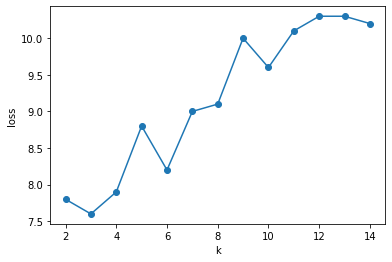

In [ ]:
# la librairie pyplot sert a afficher les diagrammes
errors=[]
# un tableau d'erreur qui va contenir les valeurs des erreurs pour chaque k
# k=nombre de voisin
# on faire une iteration pour k allant de 2 a 15
for k in range(2,15):
    knn=neighbors.KNeighborsClassifier(k)
    errors.append(100*(1-knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

We remark that the best choice is when k=8, because with this fixed value we obtain the most small loss value.

We go with k=8

In [ ]:
#On recupere le classifier le plus performant
knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#We use the model after the training set for prediction on x_test
# on recupere les predictions sur les donnees test
y_pred=knn.predict(x_test)

In [ ]:
# On va redimensionner le x_test sous forme d'image.
# Une image varie entre 0 et 28 pixels
#reshape est une fonction qui permet de creer une image à partir d'une matrice
# ce pixels. Dans notre cas on 28x28 pixels
images =x_test.to_numpy().reshape((-1,28,28))

In [ ]:
# on va selectionner 12 images dans l'ensemble de nos images
# np.random.randint permet de selection un entier au hasard dans notre cas on
# selectionne seulement 12.
select = np.random.randint(images.shape[0], size=12)

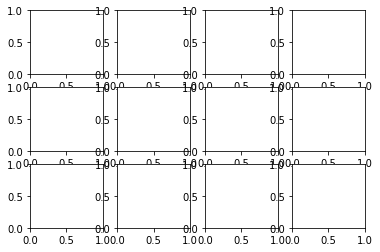

In [ ]:
# on va dessiner un contour contenant ou subplots 4 lignes et 3 colonnes
fig,ax=plt.subplots(3,4)

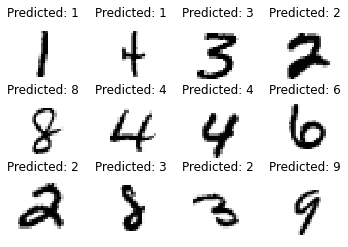

In [ ]:
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Predicted: {}'.format(y_pred[value]))
plt.show()

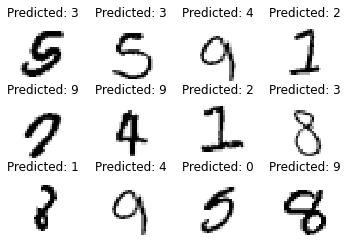

In [ ]:
# on récupère les données mal prédites
misclass = (y_test != y_pred)
misclass_images = images[misclass,:,:]
misclass_predicted = y_pred[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées
#à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()